<a href="https://colab.research.google.com/github/Brithysetu/cloud_storage/blob/main/exerciciopreprova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Cloud Storage Conceitos***


1- Explique como funciona as classes de armazenamento, Standard, Nearline, Coldline e Archive.

In [ ]:
'''
Standard -Destinada a dados acessados com frequência, Melhor opção para dados de armazenamento de curto prazo.

Nearline - Projetada para dados acessados esporadicamente, aproximadamente uma vez por mês.

Coldline - Melhor opção para recuperação de desastres e dados acessados menos do que uma vez por trimestre,para dados raramente acessados,
ferece um custo de armazenamento menor.

Archive - Melhor opção para preservação digital e duradoura de dados acessados menos de uma vez ao ano,
a classe mais econômica, voltada para dados que quase nunca serão acessados

'''


2 - Quando seria apropriado utilizar a classe de armazenamento Archive no Google Cloud Storage?

In [ ]:
A Archive é apropriada para dados que precisam ser armazenados por longos períodos é uma boa escolha para:
- Arquivos de projetos antigos ou históricos que podem não ser acessados.
- Dados para auditorias que devem ser preservados por anos.


3- O que significa escolher uma região ou multirregião ao armazenar dados no Google Cloud Storage?


In [ ]:
'''
Região: você escolhe uma área geográfica específica onde os dados serão armazenados.

Multirregião: os dados são replicados em várias regiões dentro de uma área geográfica maior ,
ponto positivo porque  que os dados permanecem acessíveis mesmo em caso de falha em uma região,
mas tem um valor maior também.

'''

4-Qual é a diferença entre armazenar dados em uma região específica e em uma multirregião no Google Cloud Storage?


In [ ]:
'''
Região específica*:  custo reduzido. Porém, a disponibilidade dos dados pode ser impactadas se houver uma interrupção nessa região.

Multirregião: o custo de armazenamento é mais alto comparado ao armazenamento regional. Porem, dados permanecem acessíveis mesmo em caso de falha em uma região
'''

5-O que são as opções de controle de permissões Uniforme e Detalhada no Google Cloud Storage e como elas diferem?

In [ ]:
'''
Controle de permissões uniforme: 'Garanta o acesso uniforme a todos os objetos do bucket ao usar somente permissões no nível do bucket (IAM).
A opção se torna permanente em 90 dias''

-- significa que todas as permissões são uniformemente aplicadas a todos os objetos dentro do bucket.

Controle de permissões detalhado: 'Especifica o acesso a objetos individuais usando permissões no nível do objeto (ACLs),
além das permissões no nível do bucket (IAM)'

Ou seja, você pode configurar acessos diferentes para cada objeto dentro de um bucket.

'''

6- Com relação a área de análise de dados, qual das duas seria mais interessante quando se tem muitos objetos em buckets e por que

In [ ]:
'''
Na área de análise de dados, a permissão uniforme geralmente é mais interessante quando há muitos objetos,
porque facilita a gestão das permissões, reduz a complexidade e o risco de erros.

'''

# **Configuração**

1-Crie uma bucket com a seguintes configurações:
  a- Nome deve conter inicialmente meu-bucket-exercicio, com um sufixo qualquer, pois nome de bucket não se repete. Exemplo: meu-bucket-exercicio-123321.
  b- Localização região IOWA
  c- Classe Standard
  d- Controle de Acesso Detalhado, não esqueça de desmarcar a opção de prevenção ao acesso público.
  e -Crie pastas dfs_brutos e dsf_tratados e backups_db
  f- Suba o arquivo no link para a pasta de dfs_brutos e crie um link público para acessar o mesmo.


In [ ]:
https://storage.googleapis.com/meu-bucket-exercicio-bianca/dfs_brutos/alunos.csv

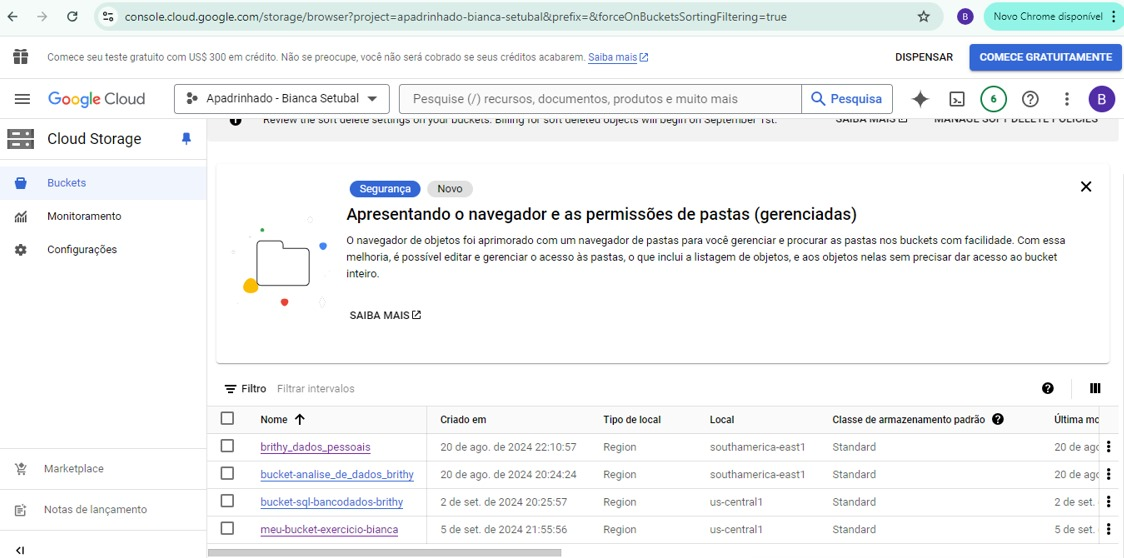

# **Python e Cloud Storage.**
Com o arquivo que você subiu e deixou público na atividade anterior, carregue ele em um Dataframe com pandas, adicione uma coluna que calcule a média das 3 notas, verifique se o dado está correto e suba ele para o Cloud Storage utilizando o próprio python com a biblioteca storage para a pasta de dfs_tratados. Use a bucket criada no exercício. Compartilhe o link público.


In [ ]:
# conexão com o mysql
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 46.5 MB/s eta 0:00:00


In [ ]:
!curl ipecho.net/plain

35.204.198.45

In [ ]:
import pandas as pd
df_alunos = pd.read_csv('https://storage.googleapis.com/bucket-sql-bancodados-brithy/dfs_brutos/alunos%20(2)%20(1).csv')
display(df_alunos)

,matricula,nome,email,nota_1,nota_2,nota_3
0,101,Ana Silva,ana.silva@email.com,7.5,8.0,7.0
1,102,Bruno Costa,bruno.costa@email.com,8.0,7.5,8.5
2,103,Carla Souza,carla.souza@email.com,6.5,7.0,6.0
3,104,Diego Ferreira,diego.ferreira@email.com,9.0,8.5,9.5
4,105,Elisa Lima,elisa.lima@email.com,7.0,6.5,7.5


In [ ]:
df_alunos['media'] = round((df_alunos['nota_1'] + df_alunos ['nota_2'] + df_alunos ['nota_3']) / 3,2)
display(df_alunos)

,matricula,nome,email,nota_1,nota_2,nota_3,media
0,101,Ana Silva,ana.silva@email.com,7.5,8.0,7.0,7.5
1,102,Bruno Costa,bruno.costa@email.com,8.0,7.5,8.5,8.0
2,103,Carla Souza,carla.souza@email.com,6.5,7.0,6.0,6.5
3,104,Diego Ferreira,diego.ferreira@email.com,9.0,8.5,9.5,9.0
4,105,Elisa Lima,elisa.lima@email.com,7.0,6.5,7.5,7.0


In [ ]:
df_alunos.to_csv('media_notas.csv', index=False)

In [ ]:
#Enviar os dados para Storage através do Colab
# instalar um upgrade do google-cloud-storage
!pip install --upgrade google-cloud-storage

In [ ]:
# Autenticação no Google Colab para permitir o acesso aos serviço do Cloud

from google.colab import auth
auth.authenticate_user()

In [ ]:
# Importar a biblioteca do Cloud Storage
from google.cloud import storage
# Cria um cliente que interage com as Bukets (Pastas do Storage)
client = storage.Client()
#Definir qual Buket quer usar
bucket_name = 'bucket-sql-bancodados-brithy'
# Recuperar dados da Bucket
bucket = client.bucket(bucket_name)
display(bucket)






<Bucket: bucket-sql-bancodados-brithy>

In [ ]:

# Define o caminho de destino do arquivo
destination_blob_name = 'dfs_tratados/media_notas.csv'
# Nome do arquivo que vou enviar
source_file_name = 'media_notas.csv'
# Cria um objeto BLOB no Google Storage
blob = bucket.blob(destination_blob_name)
# Envia o arquivo para o Google Storage
blob.upload_from_filename(source_file_name)
# Exibe a mensagem de confirmação
print(f"Arquivo {source_file_name} enviado para o Google Storage como {bucket_name}/{destination_blob_name}.")




Arquivo media_notas.csv enviado para o Google Storage como bucket-sql-bancodados-brithy/dfs_tratados/media_notas.csv.


## ***Banco de Dados***


## **1-Defina o conceito de dado e informação.**







In [ ]:
'''

Dado: Representa um valor bruto, sem contexto ou significado específico. Pode ser um número, uma letra, uma imagem, etc.

Informação: É o dado processado e contextualizado, que possui significado e pode ser utilizado para tomar decisões.
Conceito de Banco de Dados

'''

# **2**-Qual o conceito de banco de dados? negrito



In [ ]:
'''

Um banco de dados é uma coleção organizada de dados que podem ser facilmente acessados,
gerenciados e atualizados. Ele permite o armazenamento e a recuperação eficiente de grandes quantidades de informações.

'''

# **3-O é um SGBD, de exemplos.**

In [ ]:
Sistema de Gerenciamento de Banco de Dados (SGBD)
Um SGBD é um software que facilita a criação, gerenciamento e manipulação de bancos de dados. Exemplos incluem:

Oracle
MySQL
Microsoft SQL Server
PostgreSQL


## **4 - Descreva cada um dos tipos de atributos:**



monovalorado


In [ ]:
'''
Possui um unico valor
ex: cpf, rg, idade.
'''

multivalorado


In [ ]:
'''
Possui N valores
ex: telefone, email's, endereço
'''

composto


In [ ]:
'''
Pode ser formado por outros atributos
ex: endereço ( rua, numero, bairro,cep,estado,complemento,cidade,pais)
'''

simples


In [ ]:
'''
É indivisivel, atômico
ex: nome completo, cpf
'''

chave primária

In [ ]:
'''
Atributo que identifica de forma unica um registro na tabela
'''

# ***5- Descreva o conceito de relacionamento e chave estrangeira.***

In [ ]:
'''
Relacionamento: Associação entre duas ou mais tabelas.
Exemplo: um aluno está matriculado em um curso.

Chave Estrangeira: Um atributo em uma tabela que é chave primária em outra tabela,
estabelecendo uma ligação entre as tabelas.
Exemplo: código do curso na tabela de alunos.

'''


## **6 - Explique cardinalidade 1:1. De Exemplos.**

In [ ]:
'''

1:1 (Um para Um): Cada registro em uma tabela está associado a um único registro em outra tabela.
Exemplo: cada pessoa tem um único passaporte, unico cpf.

'''

## **7- Explique cardinalidade 1:N. De Exemplos**

In [ ]:
'''

1:N (Um para Muitos): Um registro em uma tabela pode estar associado a múltiplos registros em outra tabela.
Exemplo: um autor pode ter escrito vários livros, de varios generos.

'''

## **8 - Explique cardinalidade N:N**

In [ ]:
'''

N:N (Muitos para Muitos): Múltiplos registros em uma tabela podem estar associados a múltiplos registros em outra tabela.
Exemplo: alunos e disciplinas, onde um aluno pode se matricular em várias disciplinas e uma disciplina pode ter vários alunos.
professores e disciplinas, onde um professor pode dar varias diciplinas e uma disciplina pode ter mais de um professor.

'''


## **9 - Um relacionamento N:N pode ter atributos dentro do relacionamento? De exemplo de situação na qual possa ocorrer.**

In [ ]:
'''

Sim, um relacionamento N:N pode ter atributos próprios.
Exemplo: em um sistema de matrícula, a tabela que relaciona alunos e disciplinas pode ter um atributo “data de matrícula”.
ou de uma loja, pode ter pedidos e produtos, e atributo quantidade, subtotal.
'''


# Modelagem MER

Crie o Modelo Entidade e Relacionamento do cenário abaixo:
	A Harmonia Musical é uma plataforma de streaming voltada para artistas independentes. Cada artista, com atributos como id_artista, nome, gênero e data_nascimento, pode lançar vários álbuns. Cada álbum é identificado por id_album, titulo e ano_lancamento, e pertence a um único artista. Dentro de cada álbum, há uma coleção de músicas, onde cada música tem atributos como id_musica, titulo e duracao. Cada álbum contém várias músicas, e cada música pertence a um único álbum. Assim, os fãs podem explorar a discografia completa de um artista, ouvindo as faixas específicas dentro de cada álbum.

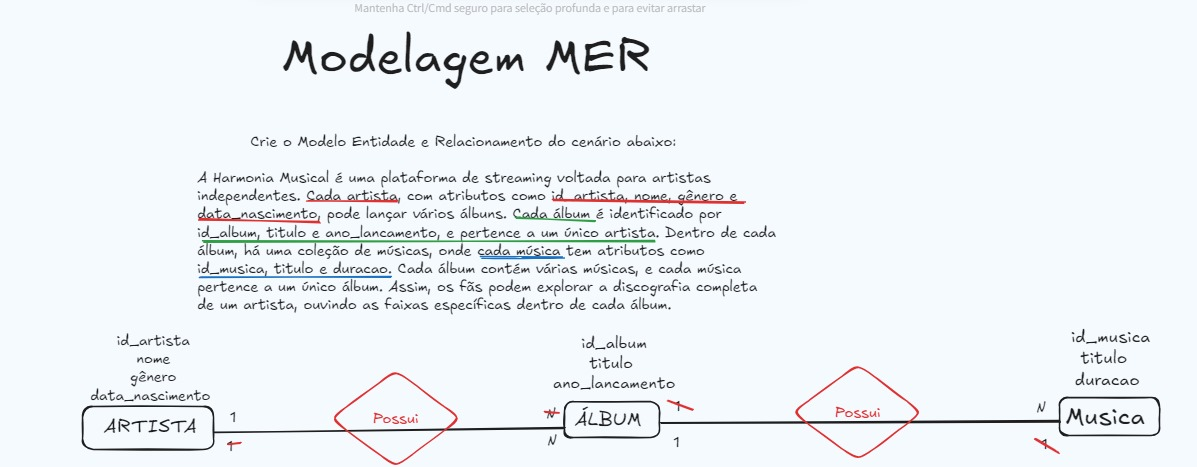

## **Modelo Relacional**
	Com base no DER criado da questão anterior defina os esquemas das tabelas e como elas se relacionam.

Dica: Ao final desse passo deve haver apenas 3 esquemas de tabelas.


## **SQL**

# **Com os esquemas definidos da questão anterior, faça os seguintes comandos em SQL.**



1 - Crie um banco de dados chamado harmonia_musical.



In [ ]:
CREATE DATABASE Harmonia_Musical;

USE Harmonia_Musical;

2 - Crie as tabelas que foram definidas e suas respectivas colunas.


In [ ]:

CREATE TABLE Artista (
    id INT PRIMARY KEY,
    nome VARCHAR(100),
    gênero VARCHAR(50),
    data_nascimento DATE
);

CREATE TABLE Album (
    id_album INT PRIMARY KEY,
    titulo VARCHAR(100),
    ano_lancamento YEAR,
    id_artista INT,
    FOREIGN KEY (id_artista) REFERENCES Artista(id_artista)
);

CREATE TABLE Musica (
    id_musica INT PRIMARY KEY,
    titulo VARCHAR(100),
    duracao TIME,
    id_album INT,
    FOREIGN KEY (id_album) REFERENCES Album(id_album)
);

3 - Crie 5 inserts para cada tabela.

In [ ]:
INSERT INTO Artista (id_artista, nome, gênero, data_nascimento) VALUES (6, 'Artista F', 'Rock', '1993-02-14');
INSERT INTO Artista (id_artista, nome, gênero, data_nascimento) VALUES (7, 'Artista G', 'Pop', '1987-08-22');
INSERT INTO Artista (id_artista, nome, gênero, data_nascimento) VALUES (8, 'Artista H', 'Jazz', '1995-12-05');
INSERT INTO Artista (id_artista, nome, gênero, data_nascimento) VALUES (9, 'Artista I', 'Hip-Hop', '1990-06-18');
INSERT INTO Artista (id_artista, nome, gênero, data_nascimento) VALUES (10, 'Artista J', 'Classical', '1980-09-10');


In [ ]:
INSERT INTO Album (id_album, titulo, ano_lancamento, id_artista) VALUES (6, 'Album 6', 2023, 6);
INSERT INTO Album (id_album, titulo, ano_lancamento, id_artista) VALUES (7, 'Album 7', 2022, 7);
INSERT INTO Album (id_album, titulo, ano_lancamento, id_artista) VALUES (8, 'Album 8', 2021, 8);
INSERT INTO Album (id_album, titulo, ano_lancamento, id_artista) VALUES (9, 'Album 9', 2020, 9);
INSERT INTO Album (id_album, titulo, ano_lancamento, id_artista) VALUES (10, 'Album 10', 2019, 10);


In [ ]:

INSERT INTO Musica (
    id_musica
    titulo,
    duracao,
    id_album) VALUES (6, , '00:03:45', 3);
INSERT INTO Musica (id_musica, titulo, duracao, id_album) VALUES (7, 'Musica 2', '00:04:20', 3);
INSERT INTO Musica (id_musica, titulo, duracao, id_album) VALUES (8, 'Musica 3', '00:02:50', 4);
INSERT INTO Musica (id_musica, titulo, duracao, id_album) VALUES (9, 'Musica 4', '00:03:10', 4);
INSERT INTO Musica (id_musica, titulo, duracao, id_album) VALUES (10, 'Musica 5', '00:05:15', 5);


## **Cloud SQL**

# 1 - Com base nos scripts gerados, utilize eles para criar o banco de dados, as tabelas e os registros dentro da sua instância do mysql.

# 2 - Com o banco de dados harmonia_musical funcionando corretamente, no Colab, defina a conexão com o banco de dados, para realizar as consultas abaixo:

#    **Listar todos os artistas**


In [ ]:
# Para instalar update do google-cloud-storage
!pip install --upgrade google-cloud-Storage

In [ ]:
# como descobrir o ip do nosso colab.
# toda vez que você precisar conectar ao banco , tem que pegar o ip do colab adicionar a rede
!curl ipecho.net/plain

35.204.198.45

In [ ]:
# Função para executar as minhas consultas e retornar meu DataFrame.
# importar o mysql.connector e pandas
import mysql.connector as mc # apelido para usar os métodos do mysql.connector
import pandas as pd          # apelido para usar os métodos do pandas

# Recebe uma consulta.
def queryDf(query):
  # Definir variáveis de conexao
  host = '35.225.237.49' # Endereço do servidor MySQL
  user = 'root'         # Nome de usuário do MySQL
  password = ''         # Senha do MySQL (deve ser definida para a conexao)
  database = 'Harmonia_Musical'  # Nome do banco de dados a ser utilizado

  # Estabelecimento da conexao com o banco de dados
  connection = mc.connect(
      host=host,
      user=user,
      password=password,
      database=database
  )

  # Criação de um cursor para executar consultas SQL
  cursor = connection.cursor()

  # Execução da consulta passada como argumento para a função
  cursor.execute(query)

  # Recuperar os dados da consulta
  result = cursor.fetchall()

  # Conversão dos resultados em um DataFrame do Pandas, usando os nomes das colunas obtidas do cursor
  df = pd.DataFrame(result, columns=cursor.column_names)

  # Fechamento do cursor após a execução da consulta
  cursor.close()

  # Fechamento da conexão com o banco de dados
  connection.close()

  return df

# Mostrar todos os álbuns lançados em um determinado ano (por exemplo, 2023)

In [ ]:
DF = queryDf(
    '''
    SELECT * FROM Musica;
    '''
    )
display(DF)


,id_musica,titulo,duracao,id_album
0,1,Musica 1,0 days 00:03:30,1
1,2,Musica 2,0 days 00:04:00,1
2,3,Musica 3,0 days 00:02:45,2
3,4,Musica 4,0 days 00:03:15,2
4,5,Musica 5,0 days 00:03:16,3


In [ ]:
 albumDF = queryDf(
    '''
    SELECT * FROM Album WHERE ano_lancamento = "2021"
    '''
    );

display(albumDF)





,id_album,titulo,ano_lancamento,id_artista
0,8,Album 8,2021,8


In [ ]:

'''
INSERT INTO Album (id_album, titulo, ano_lancamento, id_artista) VALUES (6, 'Album 6', 2023, 6);
INSERT INTO Album (id_album, titulo, ano_lancamento, id_artista) VALUES (7, 'Album 7', 2022, 7);
INSERT INTO Album (id_album, titulo, ano_lancamento, id_artista) VALUES (8, 'Album 8', 2021, 8);
INSERT INTO Album (id_album, titulo, ano_lancamento, id_artista) VALUES (9, 'Album 9', 2020, 9);
INSERT INTO Album (id_album, titulo, ano_lancamento, id_artista) VALUES (10, 'Album 10', 2019, 10);
'''

# Listar todas as músicas de um álbum específico (por exemplo, com id_album igual a 5).


In [ ]:
DF = queryDf(
    '''
    SELECT * FROM Musica;
    '''
    )
display(DF)

,id_musica,titulo,duracao,id_album
0,1,Musica 1,0 days 00:03:30,1
1,2,Musica 2,0 days 00:04:00,1
2,3,Musica 3,0 days 00:02:45,2
3,4,Musica 4,0 days 00:03:15,2
4,5,Musica 5,0 days 00:03:16,3


# Encontrar o nome dos artistas e o título de seus álbuns.


In [ ]:
artista_album_DF = queryDf(
    '''
    SELECT
      Artista.nome,
      Album.titulo
    FROM Artista
    JOIN Album ON Artista.id_artista = Album.id_artista
    '''
    )
display(artista_album_DF)

,nome,titulo
0,Artista A,Album 1
1,Artista B,Album 2
2,Artista C,Album 3
3,Artista D,Album 4
4,Artista E,Album 5


# Exibir o título e a duração de todas as músicas de um álbum específico, ordenadas por duração (por exemplo, com id_album igual a 2).**negrito**

In [ ]:
musicas_album_DF = queryDf(
    '''
    SELECT
      Album.titulo as "Album",
      Musica.titulo as "Musicas",
      Musica.duracao
    FROM Album
    JOIN Musica ON Album.id_album = Musica.id_album
    WHERE Album.id_album = 3
    ORDER BY Musica.duracao ASC
    '''
    )
display(musicas_album_DF)

,Album,Musicas,duracao
0,Album 3,Musica 5,0 days 00:03:16


,id_musica,titulo,duracao,id_album
0,1,Musica 1,0 days 00:03:30,1
1,2,Musica 2,0 days 00:04:00,1
2,3,Musica 3,0 days 00:02:45,2
3,4,Musica 4,0 days 00:03:15,2
4,5,Musica 5,0 days 00:03:16,3


# Listar os álbuns e suas respectivas músicas, incluindo o título da música e a duração.

In [ ]:
all_musicasalbum_DF = queryDf(
    '''
    SELECT
      Album.titulo as "album",
      Musica.titulo as "musicas",
      Musica.duracao
    FROM Album
    JOIN Musica ON Album.id_album = Musica.id_album
    '''
    )
display(all_musicasalbum_DF)

,album,musicas,duracao
0,Album 1,Musica 1,0 days 00:03:30
1,Album 1,Musica 2,0 days 00:04:00
2,Album 2,Musica 3,0 days 00:02:45
3,Album 2,Musica 4,0 days 00:03:15
4,Album 3,Musica 5,0 days 00:03:16


# **3 - Com o resultado do item f inserido em um DataFrame, utilizando a lib do Storage, suba o conteúdo para a pasta dfs_brutos na bucket do exercício.**


In [ ]:
#Cria autenticação no colab
from google.colab import auth
auth.authenticate_user()

# Importar a biblioteca do Cloud Storage
from google.cloud import storage
# Cria um cliente que interage com as Bukets (Pastas do Storage)
client = storage.Client()
#Definir qual Buket quer usar
bucket_name = 'meu-bucket-exercicio-bianca'
# Recuperar dados da Bucket
bucket = client.bucket(bucket_name)

# **4 - No Cloud SQL, realize a Exportação (dump) do banco de dados harmonia_musical e salve o arquivo dentro da bucket em backups_db. Compartilhe o link público.**

In [ ]:
#Exporta direto na Storage do Google Cloud
all_musicasalbum_DF.to_csv('musicas_dos_albuns.csv', index=False)

In [ ]:
from google.cloud import storage
# Define o caminho de destino do arquivo
destination_blob_name = 'dfs_brutos/musicas_dos_albuns.csv'
# Nome do arquivo que vou enviar
source_file_name = 'musicas_dos_albuns.csv'
# Cria um objeto BLOB no Google Storage
blob = bucket.blob(destination_blob_name)
# Envia o arquivo para o Google Storage
blob.upload_from_filename(source_file_name)
# Exibe a mensagem de confirmação
print(f"Arquivo {source_file_name} enviado para o Google Storage como {bucket_name}/{destination_blob_name}.")

Arquivo musicas_dos_albuns.csv enviado para o Google Storage como meu-bucket-exercicio-bianca/dfs_brutos/musicas_dos_albuns.csv.


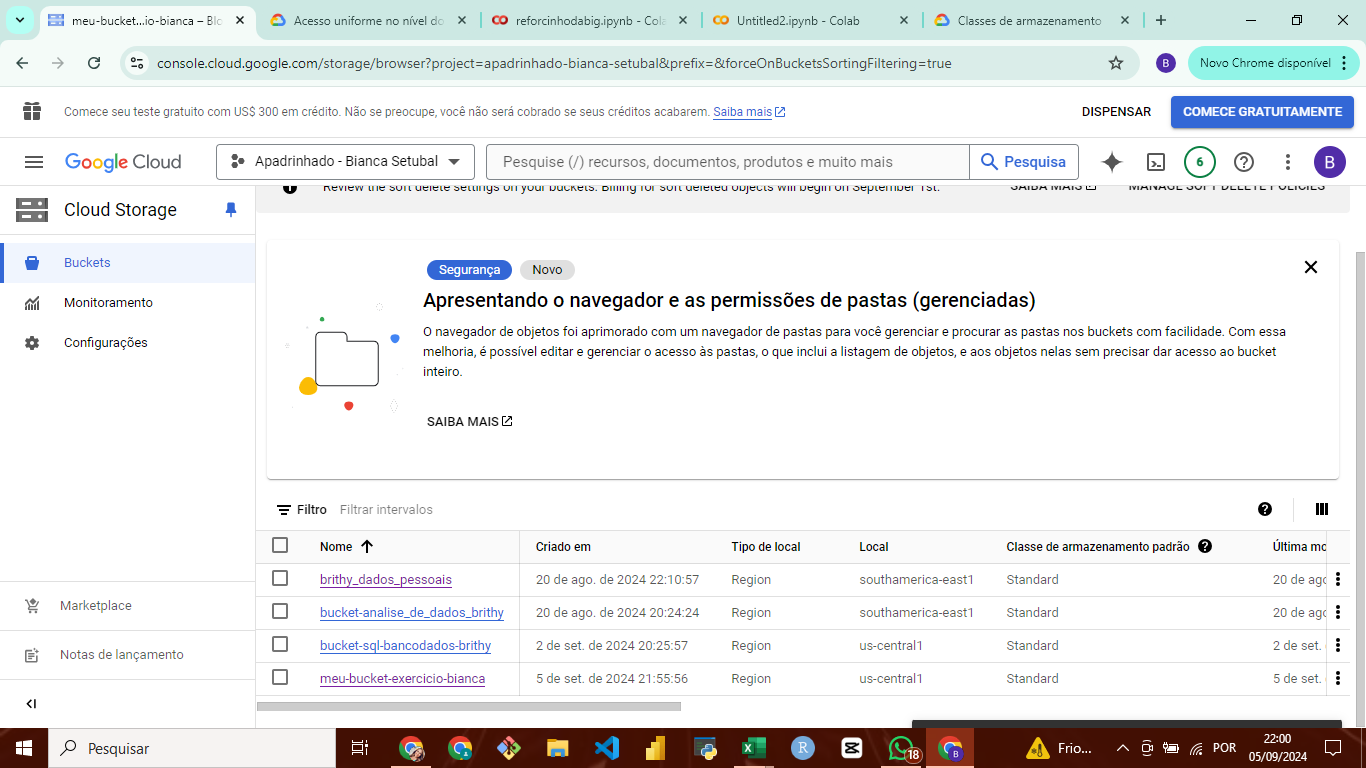

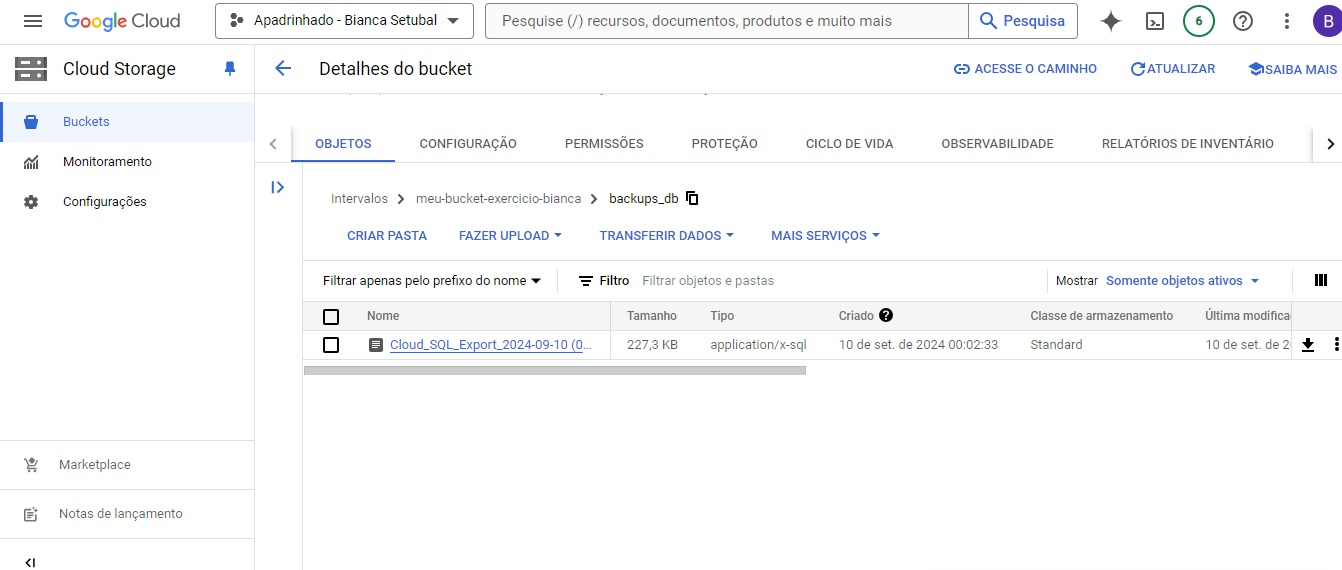